# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Importing the dataset

In [31]:
dataset = pd.read_csv('Again_Updated_PowerPlay_Batters.csv')
X = dataset.iloc[:, [5, 12]].values

## Using the elbow method to find the optimal number of clusters

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


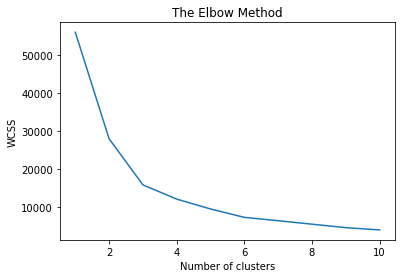

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [33]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

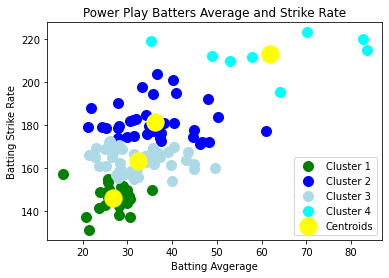

In [34]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lightblue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Power Play Batters Average and Strike Rate')
plt.xlabel('Batting Avgerage')
plt.ylabel('Batting Strike Rate')
plt.legend()
plt.show()

In [35]:
kmeans.labels_ 

array([3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [36]:
dataset['Cluster'] = kmeans.labels_

In [37]:
cluster_4_players = dataset[dataset['Cluster'] == 3]

In [38]:
cluster_4_players.head(10)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,AggAvgStr,Cluster
0,MD Gunathilaka,18,421,275,6,70.17,153.09,54,65,10,1,0,223.26,3
1,Mohammad Rizwan,29,579,422,7,82.71,137.20,44,74,17,0,0,219.91,3
2,FH Allen,44,"1,023",556,29,35.28,183.99,66,115,52,6,0,219.27,3
3,Ishan Kishan,24,501,381,6,83.50,131.50,63,73,11,1,0,215.00,3
4,CDJ Dent,21,490,300,10,49.00,163.33,50,64,15,1,0,212.33,3
5,JM Bairstow,35,752,489,13,57.85,153.78,59,90,36,1,0,211.63,3
6,SS Eskinazi,35,740,472,14,52.86,156.78,46,100,20,0,0,209.64,3
10,Shan Masood,34,705,537,11,64.09,131.28,58,98,6,1,0,195.37,3


In [49]:
cluster_2_players = dataset[dataset['Cluster'] == 1]

In [58]:
cluster_2_players.head(40)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,AggAvgStr,Cluster
7,A Lyth,44,914,547,25,36.56,167.09,50,120,34,2,0,203.65,1
8,AD Hales,136,"2,779","1,731",69,40.28,160.54,74,367,113,5,0,200.82,1
9,WG Jacks,61,"1,195",726,36,33.19,164.60,55,148,56,3,0,197.79,1
11,Z Crawley,38,777,504,19,40.89,154.17,47,98,22,0,0,195.06,1
12,G Clark,27,499,314,14,35.64,158.92,45,62,14,0,0,194.56,1
13,LJ Wright,41,864,599,18,48.00,144.24,49,134,15,0,0,192.24,1
14,RRS Cornwall,25,474,292,17,27.88,162.33,51,57,30,1,0,190.21,1
15,Rahmanullah Gurbaz,33,637,384,29,21.97,165.89,55,63,43,3,0,187.86,1
16,NT Broom,25,479,318,14,34.21,150.63,46,58,19,0,0,184.84,1
17,DA Warner,51,956,717,19,50.32,133.33,54,116,26,3,0,183.65,1


In [51]:
cluster_3_players = dataset[dataset['Cluster'] == 2]

In [56]:
cluster_3_players.head(30)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,AggAvgStr,Cluster
41,L Ronchi,20,340,232,13,26.15,146.55,32,41,16,0,0,172.70,2
45,JP Inglis,47,828,567,32,25.88,146.03,41,103,26,0,0,171.91,2
47,CA Lynn,74,"1,322",929,47,28.13,142.30,46,154,61,0,0,170.43,2
48,S Dhawan,67,"1,170",905,29,40.34,129.28,48,149,34,0,0,169.62,2
49,T Banton,61,"1,057",723,46,22.98,146.20,56,129,46,2,0,169.18,2
50,MJ Guptill,34,606,454,17,35.65,133.48,46,56,32,0,0,169.13,2
51,LM Reece,40,673,474,25,26.92,141.98,47,72,31,0,0,168.90,2
52,HD Rutherford,55,901,627,36,25.03,143.70,45,106,42,0,0,168.73,2
53,CS Delport,57,982,703,34,28.88,139.69,52,136,34,1,0,168.57,2
54,RE Levi,21,350,248,13,26.92,141.13,48,46,11,0,0,168.05,2


In [43]:
cluster_1_players = dataset[dataset['Cluster'] == 0]

In [60]:
cluster_1_players.head(40)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,AggAvgStr,Cluster
83,EJ Pollock,30,404,285,26,15.54,141.75,46,50,19,0,0,157.29,0
91,ADS Fletcher,68,"1,025",793,40,25.62,129.26,41,102,55,0,0,154.88,0
94,Sharjeel Khan,28,463,362,18,25.72,127.90,39,50,26,0,0,153.62,0
95,J Charles,44,728,594,25,29.12,122.56,46,90,24,0,0,151.68,0
96,J Weatherald,46,746,610,26,28.69,122.30,40,96,19,0,0,150.99,0
97,CH Gayle,56,880,709,34,25.88,124.12,54,102,51,1,0,150.00,0
98,CT Bancroft,16,248,217,7,35.43,114.29,34,24,7,0,0,149.72,0
99,BA Godleman,23,330,276,11,30.00,119.57,40,41,8,0,0,149.57,0
100,MDE Holden,23,311,249,13,23.92,124.90,37,38,6,0,0,148.82,0
101,BR McDermott,26,432,361,15,28.80,119.67,44,35,24,0,0,148.47,0
